# Code for Assignment 1 FYS-2021
by Liv Marie Lein-Mathisen

In [399]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1 - Preprocessing
## Exercise 1a


In [400]:
filename = "/Users/livlein-mathisen/Documents/2024 høst - FYS-2021 - Machine Learning/Exercise set/Assignment 1/SpotifyFeatures.csv"
path = open(filename, "r")
data = pd.read_csv(path, sep=",", skiprows=0)

feature_names = [i for i in data.columns]
feature_data= data[feature_names]

print(f"The dataset has {len(feature_data)} number of samples (songs), and {len(feature_names)} number of features (song properties).")

The dataset has 232725 number of samples (songs), and 18 number of features (song properties).


## Exercise 1b
Retrieving all samples belonging to two genres, Classical and Pop, and creating labels for the samples: ’Pop’ = 1, ’Classical’ = 0. 

In [401]:
# filter the data for Pop and Classical 
filtered_data = data[data['genre'].isin(['Pop', 'Classical'])].copy()

# create labels: Pop = 1, Classical = 0
filtered_data['label'] = filtered_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# print(filtered_data["label"].value_counts())
num_pop = len(filtered_data[filtered_data['label'] == 1])
num_classical = len(filtered_data[filtered_data['label'] == 0])

print(f"Number of 'Pop' samples: {num_pop}")
print(f"Number of 'Classical' samples: {num_classical}")

Number of 'Pop' samples: 9386
Number of 'Classical' samples: 9256


## Exercise 1c
Making 2 numpy arrays: songs along the rows and songs’ features ("liveness" and "loudness") as columns.

Creating a training and test set by splitting the dataset in a 80% 20% split.

In [402]:
# gets the livelines and loudness features:
X = filtered_data[['liveness', 'loudness']]

# the labels (from 1b), Pop = 1, Classical = 0
y = filtered_data['label'] 


# split the data into training and test sets:
from sklearn.model_selection import train_test_split
# stratify=y ensures the same class distribution, and random_state to shuffle the songs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)   

y_train = np.array(y_train)         # goes from dataframe to numpy array (easier for later)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

## Exercise 1d [Bonus] 
Plotting the samples on the liveness vs loudness plane.

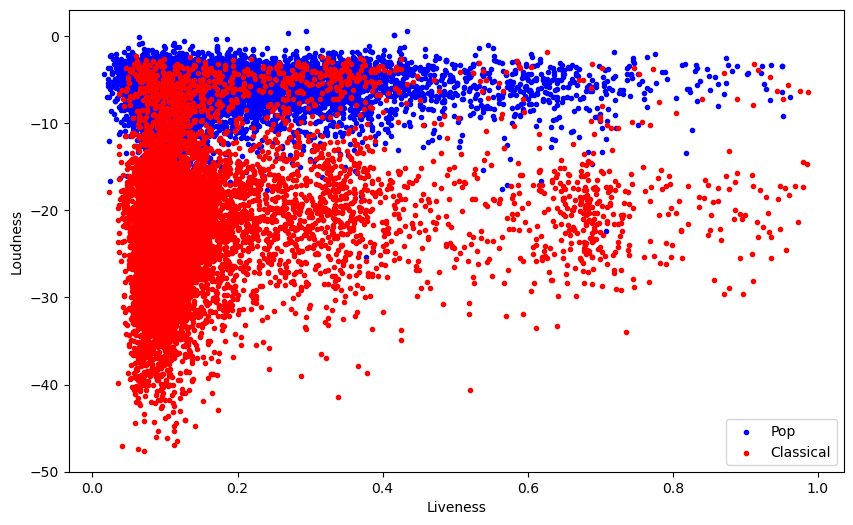

In [403]:
plt.figure(figsize=(10,6))

plt.scatter(X[y == 1]["liveness"], X[y == 1]["loudness"], color="blue", label="Pop", marker=".")
plt.scatter(X[y == 0]["liveness"], X[y == 0]["loudness"], color="red", label="Classical", marker=".")

plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.legend()
plt.savefig("1d")
plt.show()

# Exercise 2 - Machine learning with Logistic Regression

## Exercise 2a

Implementing my own logistic discrimination classifier and use the training data to train the classifier.

Logistic Regression is based on the Sigmoid function, which is defined as:

$ y = \frac{1}{1 + e^{-x}}$ or $ y = \frac{1}{1 + e^{-wx + b}} $


In [404]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

To do Logistic Regression we start with zero weights and bias, and then use Gradient descent to find the most optimal weights and bias.

In gradient descent, you use the following equations to find the minimum point:

$ w = w - \alpha \times dw $

$ b = b - \alpha \times db $


Where the gradients, dw and db, are defined as:

$dw = \mathbf{X} \times (\hat{y} - y)$


$db = \sum{(\hat{y} - y)}$




In [405]:
def LogisticRegression(X, y, weights, bias, learning_rate=0.001, n_iters=200):
    m_samples, n_features = X.shape         # dimensions of the X matrix
    
    # use a for-loop for the Gradient descent:
    for i in range(n_iters):
        linear_pred = np.dot(X, weights) + bias         # X*w + b
        predictions = sigmoid(linear_pred)              # apply the sigmoid function

        # calculate the gradients
        dw =  np.dot(X.T, (predictions - y))         # must tranpose X to get right dimensions for the matrix multiplication
        db =  np.sum(predictions - y)

        # upadte the weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db


    # now we got the most optimal weights and bias, so this is the best prediction (for this epoch)
    linear_pred = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_pred)

    # then we classify it to be 1 or 0
    class_pred = [0 if y<=0.5 else 1 for y in y_pred]

    return class_pred, weights, bias

##### Cross entropy Loss:

In [406]:
def entropy(Y, Y_hat):
    E = 0
    e = 0.000001            # set in a small epsilon term so we dont get log(0)
    for i in range(len(Y)):
        E += (Y[i] * np.log(Y_hat[i] + e) + (1-Y[i]) * np.log(1-Y_hat[i] + e))
    return -E

##### Iterate multible times (epochs):

In [407]:
def epochs(learning_rate=0.001):
    weights = np.zeros(X_train.shape[1])               # starts with zero weights
    epochs = np.arange(0,100)
    bias = 0                                            # start with zero bias
    loss = []

    for e in epochs:
        # update the bias and weights thrugh every epoch
        y_pred, weights, bias = LogisticRegression(X_train, y_train, weights, bias, learning_rate=learning_rate)
        loss.append(entropy(y_train, y_pred))

    return epochs, loss, y_pred, weights, bias

Plot for the epochs on the x-axis and the cross-entropy loss at the y-axis

/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


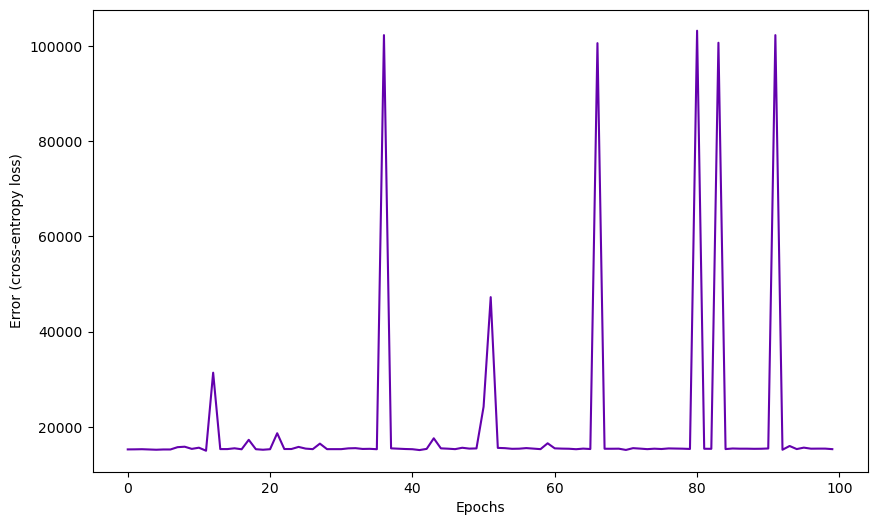

In [408]:
plt.figure(figsize=(10,6))

E = epochs()
plt.plot(E[0], E[1], color="#6401ad")        

plt.xlabel("Epochs")
plt.ylabel("Error (cross-entropy loss)")
plt.savefig("2a - 1")
plt.show()

##### Trying different learning rates:

/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))
/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))
/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))
/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


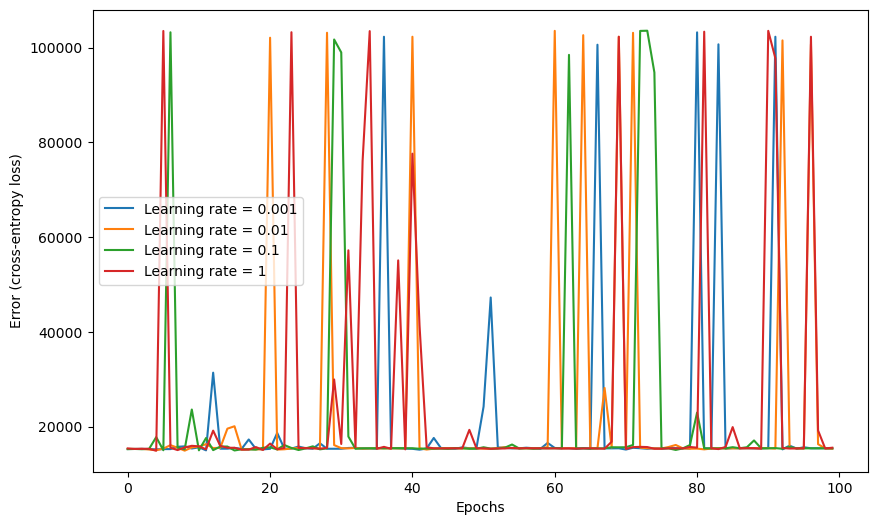

In [409]:
learning_rates_list = [0.001, 0.01, 0.1, 1]
weight_list = []
bias_list = []

plt.figure(figsize=(10,6))
for n in learning_rates_list:
    e = epochs(learning_rate=n)
    weight_list.append(e[3])
    bias_list.append(e[4])
    
    plt.plot(e[0], e[1], label=f"Learning rate = {n}")    

plt.xlabel("Epochs")
plt.ylabel("Error (cross-entropy loss)")
plt.legend()
plt.savefig("2a - 2")
plt.show()

The predicted y-values can be compared with the actual values in the y train set. From this comparison, we can calculate the accuracy (how often our model is correct in the prediction).

In [419]:
# prediction function:
def predict(X, weights, bias):

    linear_pred = np.dot(X, weights) + bias                 # X*w + b
    y_pred = sigmoid(linear_pred)                           # apply the sigmoid function
    class_pred = [0 if y <= 0.5 else 1 for y in y_pred]     # classify it to be 1 or 0
    
    return np.array(class_pred)


# checing the train accurancy for different learning rates
accurancy_list = []
for i in range(len(weight_list)):
    y_test_pred = predict(X=X_train, weights=weight_list[i], bias=bias_list[i])

    # calculate train accuracy
    acuurancy_matrix = y_test_pred == y_train            # get a True/False matrix
    test_accuracy = np.mean(acuurancy_matrix) * 100     # take the mean of the matrix to find accurancy 
    accurancy_list.append(test_accuracy)
    print(f"With learning rate {learning_rates_list[i]}, the training accuracy is {test_accuracy:.2f}%")

With learning rate 0.001, the training accuracy is 92.57%
With learning rate 0.01, the training accuracy is 92.56%
With learning rate 0.1, the training accuracy is 92.51%
With learning rate 1, the training accuracy is 92.46%


/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


The most optimal weights and bias we will use for the rest of the assignment:

(This is based om the best accurancy in 2b)

In [411]:
epochs, loss, y_pred, weights, bias = epochs(learning_rate=learning_rates_list[0])

/var/folders/zv/6tndhr3n7hlfz7bj1ttk8wqc0000gn/T/ipykernel_30548/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


## Exercise 2b

Now we use the test X and y set to test our model. 
From 2a we found weights and bias for different leraning rates, which we use in the sigmoid function to predict y values from the X test set. 
These predicted y-values can be compared with the actual values in the y test set, and find the accurancy of our model.

In [418]:
y_test_pred = predict(X=X_test, weights=weights, bias=bias)

# calculate test accuracy
acuurancy_matrix = y_test_pred == y_test            # get a True/False matrix
test_accuracy = np.mean(acuurancy_matrix) * 100     # take the mean of the matrix to find accurancy 
print(f"The test accurancy is {test_accuracy:.2f}%, which are with learning rate {learning_rates_list[0]}")

The test accurancy is 92.22%, which are with learning rate 0.001


## Exercise 2c [Bonus] 
Extracting the learned parameters from my logistic regression and use them to draw the linear line separating the data on the plot made in question (1d).

To plot the boundary between liveness ($x_1$) and loudness ($x_2$), we must solve:

$ w_1 * x_1 + w_2 * x_2 + b = 0$

In our plot the x-axis is the liveness ($x_1$) and the y-axis is the loudness ($x_2$), so we must solve the equation above for $x_2$:

$ x_2 = - (w_1 * x_1 + b) / w_2 $

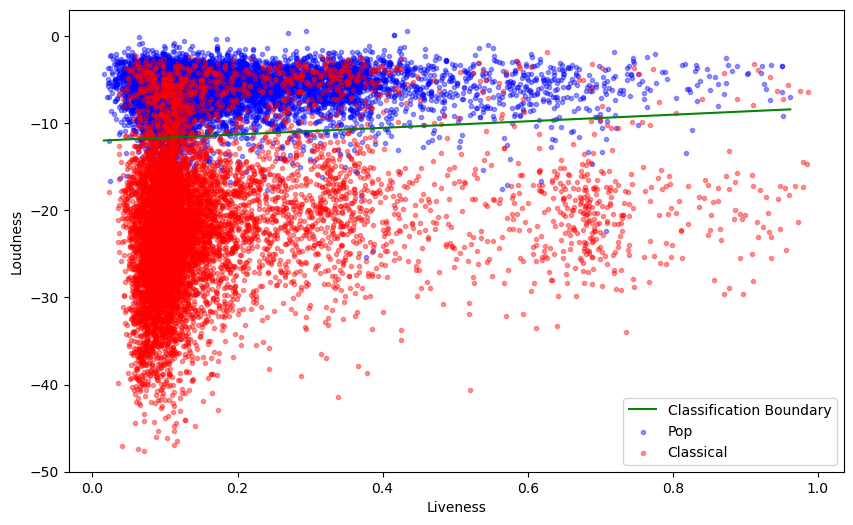

In [413]:
plt.figure(figsize=(10,6))

# plot from 1d (this is the whole dataset, not splitted)
plt.scatter(X[y == 1]["liveness"], X[y == 1]["loudness"], color="blue", label="Pop", marker=".", alpha=0.4)
plt.scatter(X[y == 0]["liveness"], X[y == 0]["loudness"], color="red", label="Classical", marker=".", alpha=0.4)

# the boundary in our classification:
x_values = np.linspace(X[y == 1]["liveness"].min(), X[y == 1]["liveness"].max())
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, color="green", label="Classification Boundary", alpha=10)


plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.legend()
plt.savefig("2c")
plt.show()

# Exercise 3 - Results

## Exercise 3a 
Using the classification results from the test set in problem 2b, we can create a confusion matrix for the classification.



In [414]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

# simple cm matrix:
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1655  196]
 [  94 1784]]


We can chech the accuracy with the cm matrix too, which are the same as in 2b.

In [415]:
cm_accuracy =(cm[0,0] +cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) * 100
print(f"Test Accuracy: {cm_accuracy:.2f}%")

Test Accuracy: 92.22%


<Figure size 1000x600 with 0 Axes>

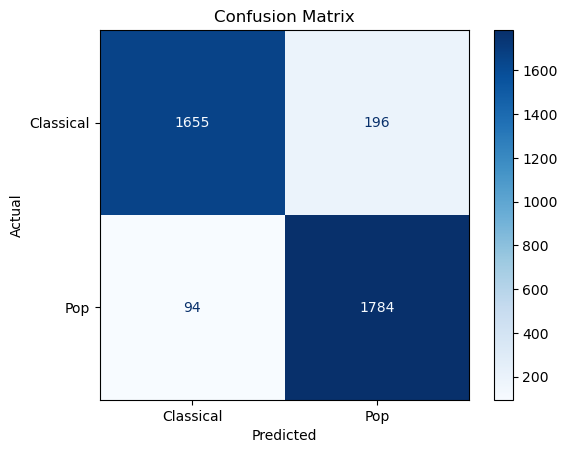

In [416]:
plt.figure(figsize=(10,6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classical', 'Pop'])
disp.plot(cmap=plt.cm.Blues) 

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.savefig("3a")
plt.show()

## Exercise 3c [Bonus] 

A Classical song that a Pop fan would like, is a song that is classical but got predicted wrong as pop by the model.

In [417]:
# find the misclasified songs
misclassified_indices = [i for i in range(len(y_test)) if y_test[i] != y_test_pred[i]]

# join with the original dataframe to get all details (all the features we removed)
misclassified_details = data.iloc[misclassified_indices]

# taking the songs that are Classical but were classified as Pop
suggested_songs = misclassified_details[(y_test[misclassified_indices] == 0) & (y_test_pred[misclassified_indices] == 1)]
suggested_songs= suggested_songs[0:5]       # suggesting 5 songs

print("Suggested Classical songs for a Pop fan:")
print(suggested_songs[['track_name', 'artist_name', 'liveness', 'loudness']])


Suggested Classical songs for a Pop fan:
                         track_name     artist_name  liveness  loudness
24          Quand je monte chez toi  Henri Salvador     0.143    -7.287
34         Ambarsare Diyan Warhiyan          Chorus     0.222   -10.732
44                Dancing with Gene        Ken Page     0.158    -8.904
70                            I Try    Fabien Nataf     0.232   -15.397
131  Sept variations sur "La Seine"    Lucie Dolene     0.289    -9.759
